In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df= pd.read_csv(r'C:\Users\tilum\OneDrive\Desktop\pandas\diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# print(pd.isnull(df)), use this to find detail info abt the null values , in this case no null values . I 
# don't have to use dropna/fillna

In [8]:
df.shape

(768, 9)

## EDA

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# There is no categorical data, so I won't be using one hot encoding- get_dummies(when categories have 
# no logical order)/
# labelencoder(usually for ordinal relationships )

In [11]:
# Lets get some graphs 

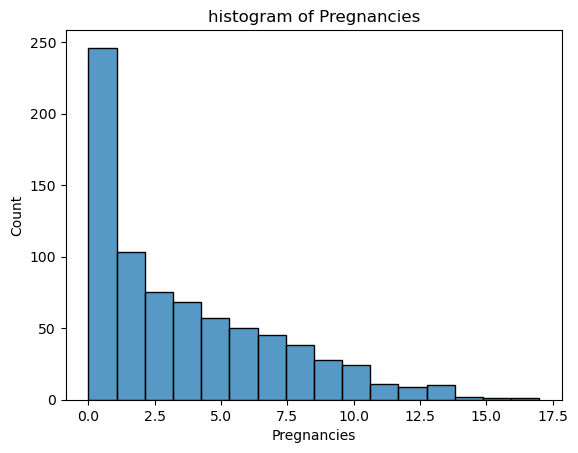

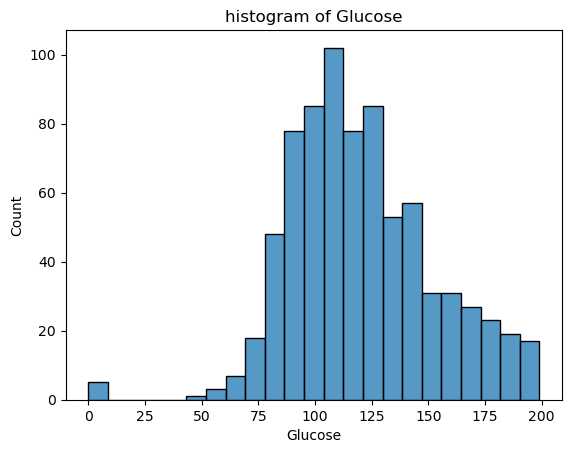

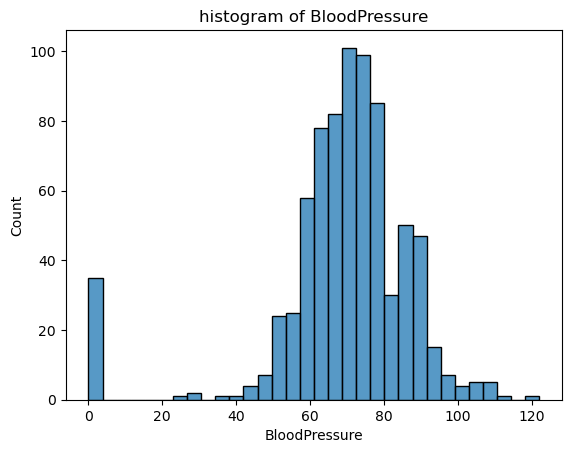

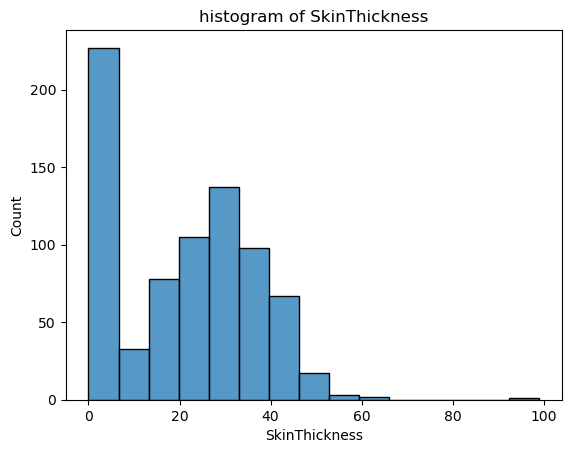

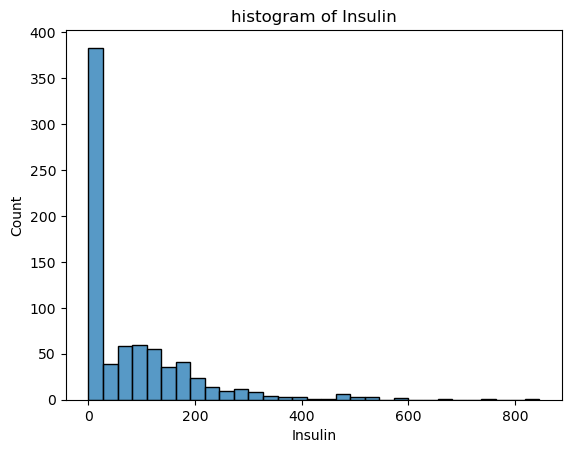

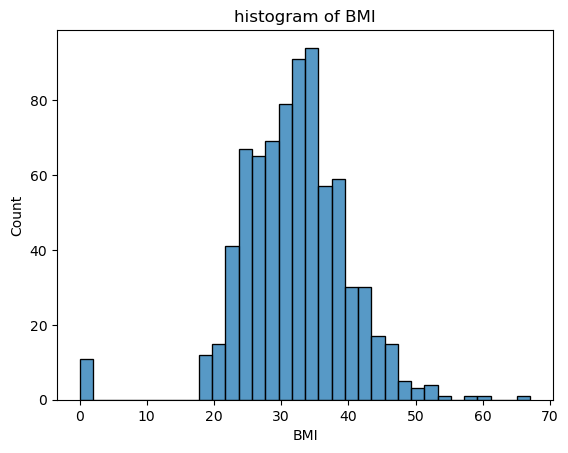

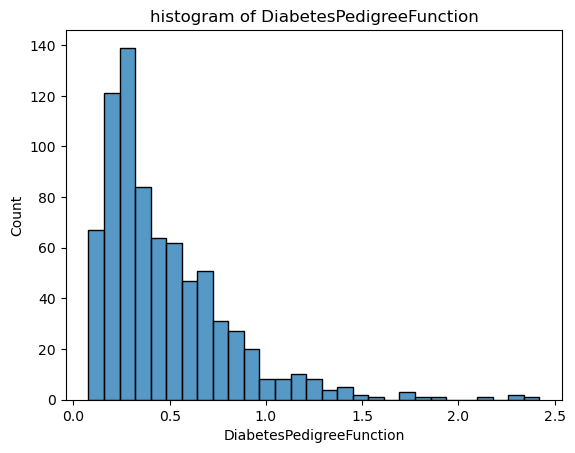

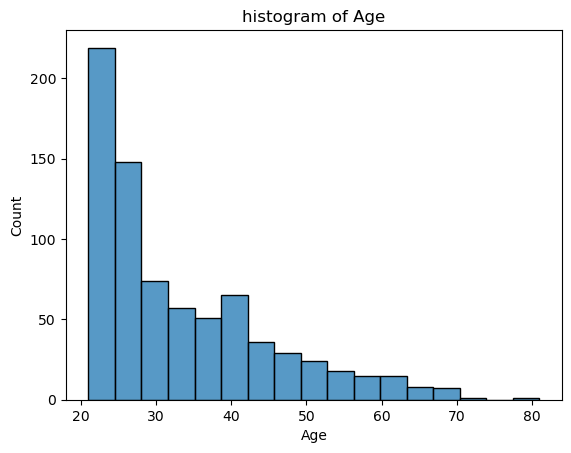

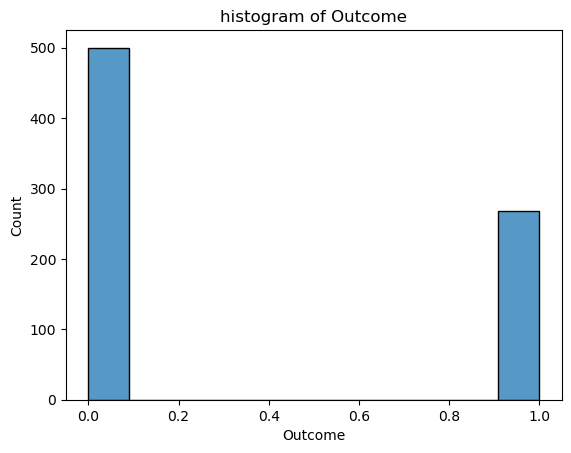

In [12]:
for col in df.columns:
    sns.histplot(df[col],kde =False)
    plt.title(f'histogram of {col}')
    plt.show()

## Feature scaling 

In [13]:
# I will be using normalization in this case. 
# why? 
# -knn algorithm 
# -not normally distributed 
# -normalization is not sensitive to outliers 

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
cols_to_scale = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler = MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [17]:
cols_before_transformation = ['Age','DiabetesPedigreeFunction','Pregnancies']

In [18]:
log_transformation = ['Age','DiabetesPedigreeFunction','Pregnancies']
df[log_transformation]=np.log1p(df[log_transformation])

In [19]:
# Plotting the original and log-transformed data side by side

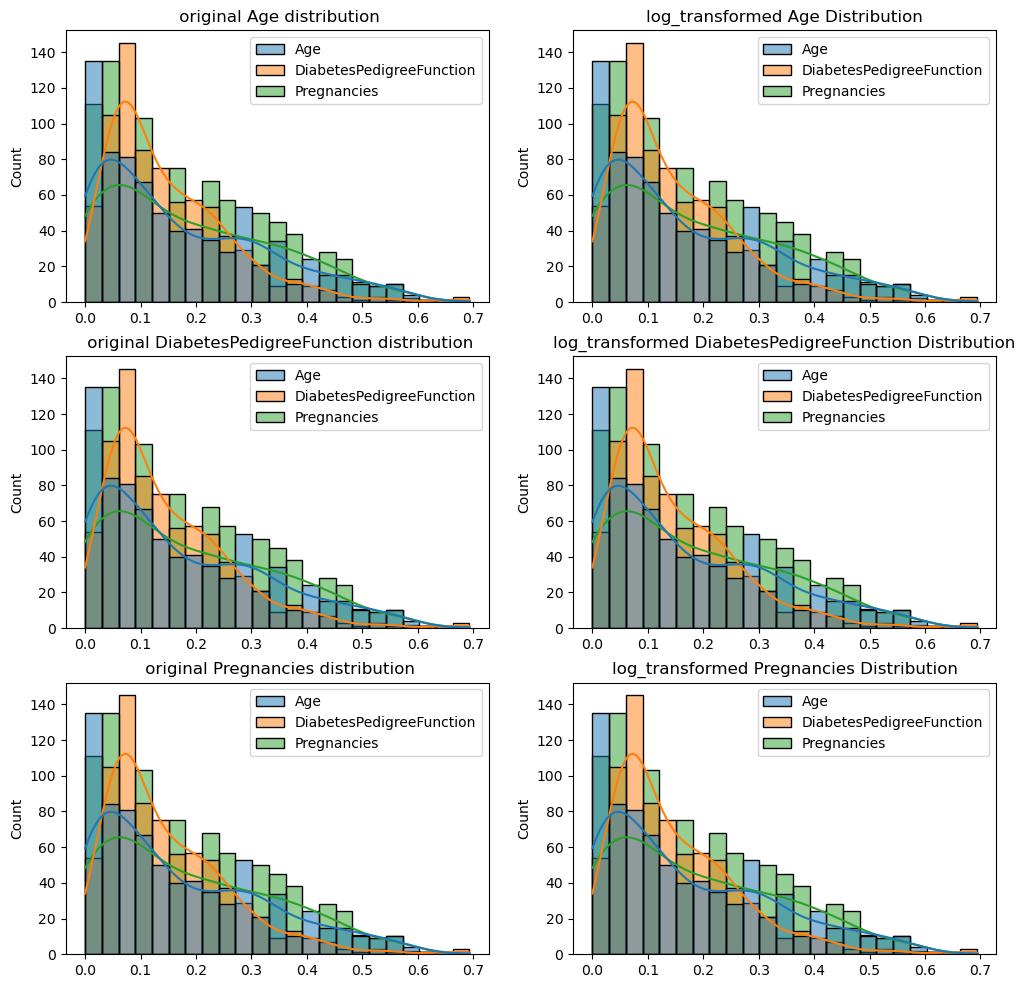

In [20]:


fig, axes = plt.subplots(3,2,figsize =(12,12))

for i, col in enumerate(log_transformation):
    sns.histplot(df[cols_before_transformation],kde = True,ax =axes[i,0])
    axes[i,0].set_title(f' original {col} distribution')

    sns.histplot(df[log_transformation],kde = True, ax = axes[i,1])
    axes[i,1].set_title(f'log_transformed {col} Distribution')

In [21]:
# Don't notice any changes after the log transformation

## Spliting the data for model evaluation 

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y =df['Outcome'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.2, random_state =42, stratify = y)

## Model building 

In [23]:
# import KneighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Define the range of k values to test 
neighbors = np.arange(1,9)

# Initialize arrays to store accuracy scores

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different values of k 

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors =k)
    
#     fit the model
    knn.fit(X_train, y_train)
#     compute accuracy on the training data
    train_accuracy[i]= knn.score(X_train,y_train)
#     compute accuracy on the testing data
    test_accuracy[i]=knn.score(X_test, y_test)




In [25]:
# output the results 

In [26]:
print('Neighbors:', neighbors)

print('Training accuracy :',train_accuracy)

print('Test accuracy:', test_accuracy)

Neighbors: [1 2 3 4 5 6 7 8]
Training accuracy : [1.         0.85179153 0.85016287 0.80781759 0.83387622 0.80944625
 0.81270358 0.8029316 ]
Test accuracy: [0.68831169 0.69480519 0.7012987  0.7012987  0.72077922 0.72077922
 0.72077922 0.72077922]


In [27]:
# plot the results

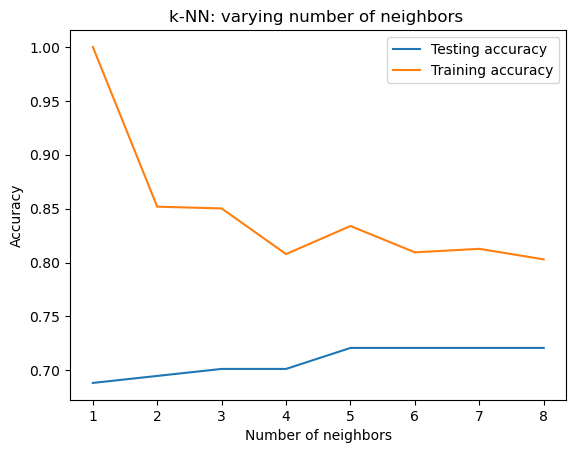

In [28]:
plt.title('k-NN: varying number of neighbors ')
plt.plot(neighbors, test_accuracy, label ='Testing accuracy')
plt.plot(neighbors, train_accuracy, label ='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [31]:
# setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# Get accuracy..classification alg score method rep accuracy
knn.score(X_test,y_test)

0.7207792207792207

In [36]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

In [37]:
# Get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[81, 19],
       [24, 30]], dtype=int64)

In [40]:
pd.crosstab(y_test,y_pred,rownames = ['True'],colnames =['Predicticted'],margins = True)

Predicticted,0,1,All
True,,,
0,81,19,100
1,24,30,54
All,105,49,154


In [41]:
# import classification_report
from sklearn.metrics import classification_report 

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       100
           1       0.61      0.56      0.58        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154



In [43]:
# Overall accuracy of the model is approx 72%.
# class o has a higher presion , recall and f1-score compared to class 1 , indicating the model performs better
# at correctly predicting true negatives than true positives.  this might req further imporvement of the model


# Model Evaluation: The classification report is commonly used after model training to understand how well 
# the model is performing on each class, which is particularly important when dealing with imbalanced datasets.
# Comparing Models: You can use it to compare the performance of different models or different configurations
# of the same model.
# Error Analysis: By looking at precision and recall, you can identify whether your model is prone to false 
# positives (low precision) or false negatives (low recall).

In [44]:
# ROC (Reciever Operating Charecteristic) curve

# It is a plot of the true positive rate against the false positive rate for the different possible cutpoints
# of a diagnostic test.

# An ROC curve demonstrates several things:

# It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will
# be accompanied by a decrease in specificity).

# The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

# The area under the curve is a measure of test accuracy.

In [45]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.style.use('ggplot')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)




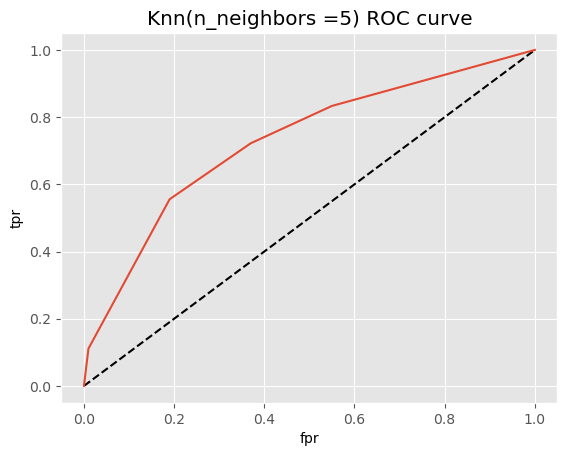

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors =5) ROC curve')
plt.show()

In [51]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7280555555555556

In [52]:
# Cross Validation

# Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

# The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

# The solution is cross validation.

# Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

# In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

# Hyperparameter tuning

# The value of k (i.e 5) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

# There is a better way of doing it which involves:

# Trying a bunch of different hyperparameter values

# Fitting all of them separately

# Checking how well each performs

# Choosing the best performing one

# Using cross-validation every time

# Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [53]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [59]:
# in case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange (1,50)}

In [60]:
knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv =5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [61]:
knn_cv.best_score_

0.770927765045412

In [63]:
knn_cv.best_params_

{'n_neighbors': 15}

In [65]:
best_knn_model = knn_cv.best_estimator_

In [66]:
best_knn_model

KNeighborsClassifier(n_neighbors=15)

In [67]:
# A knn classifier with number of neighbors as 15 achieves the best score/accuracy of .7709 or 78%

In [ ]:
# THIS TUNED MODEL CAN BE USED FOR MAKING PREDICTIONS ON NEW DATA 